# This notebook provides the commands needed to read in an NWB file with raw data taken from a trodes .rec file and to copy the relevant metadata into a DataJoint Schema designed to mimic NWB structure

## The following steps must be completed before running this notebook:
### 1) Set up access to a DataJoint database. See https://tutorials.datajoint.io/
### 2) Install pynwb. 
    See https://pynwb.readthedocs.io/en/stable/getting_started.html#installation
### 3) Install the ndx-fl-novela package. 
     conda install -c novelakrk ndx-fl-novela
### 4) Download the example franklab NWB file from DropBox. 
    https://www.dropbox.com/to_be_updated

#### Make sure we're in the franklabnwb/franklabnwb directory. 
#### Eventually this will be unnecessary because the package will properly installed

In [1]:
cd ../schema

/Users/loren/Src/NWB/nwb_datajoint/schema


#### Load all of the relevant modules

In [2]:
%load_ext autoreload
%autoreload 2


import pynwb
import os

#DataJoint and DataJoint schema
import datajoint as dj
import nwb_dj
import common_session
import common_ephys
import common_device
import common_lab
import common_task
import common_behav
import common_interval
import common_region
import common_filter

#franklabnwb functions
#from franklabnwb import fl_ns_path
#import franklabnwb.nspike_helpers as ns
#import franklabnwb.query_helpers as qu
#import franklabnwb.fl_extension as fle
#import franklabnwb.fl_extension as flh

Please enter DataJoint username:  root
Please enter DataJoint password:  ········


Connecting root@localhost:3306


#### Populate the probe schema and check that it worked. You should see entries in the probe table corresponding to different probe types

#### Next we specify the NWB file name and populate the rest of the schema
#### Replace the code below with the text for the path to the NWB file

In [3]:
nwb_file_name = '/data/nwb_builder_test_data/beans20190718s1.nwb'

In [4]:
nwb_dj.NWBPopulate([nwb_file_name]) 


Importing NWB file /data/nwb_builder_test_data/beans20190718s1.nwb
No Apparatus module found in /data/nwb_builder_test_data/beans20190718s1_pp.nwb

Processing raw position data. Estimated sampling rate: 30.0 Hz


#### The code below creates a diagram of the various schema and their relationships

In [5]:
common_filter.create_standard_filters()
common_ephys.LFPElectrode().set_lfp_elect([1, 2, 3])
common_ephys.LFP.populate()

In [34]:
common_filter.Filter.drop()

[autoreload of common_ephys failed: Traceback (most recent call last):
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions

`common_filter`.`filter` (2 tuples)
`common_ephys`.`__l_f_p` (0 tuples)
`common_ephys`.`l_f_p_band_parameters` (0 tuples)
`common_ephys`.`__l_f_p_band` (0 tuples)
`common_ephys`.`__decomp_series` (0 tuples)


Proceed? [yes, No]:  yes


Tables dropped.  Restart kernel.


In [6]:
common_session.Session()

nwb_file_name,subject_id,institution_name,lab_name,nwb_raw_file_name the name of the file containing all of the raw ephys data,session_id,session_description,session_start_time,timestamps_reference_time,experiment_description


In [6]:
(common_filter.Filter() & {'filter_name': 'test'} & {'filter_samp_freq': 30000}).fetch()

array([('test', 30000, 'lowpass', -1., -1., 400., 450., '', array([400, 450]), array([-7.36452636e-06, -6.94935802e-06, -6.48006791e-06, ...,
       -6.48006791e-06, -6.94935802e-06, -7.36452636e-06]), array([1]))],
      dtype=[('filter_name', 'O'), ('filter_samp_freq', '<i8'), ('filter_type', 'O'), ('filter_low_stop', '<f8'), ('filter_low_pass', '<f8'), ('filter_high_pass', '<f8'), ('filter_high_stop', '<f8'), ('filter_comments', 'O'), ('filter_band_edges', 'O'), ('filter_b', 'O'), ('filter_a', 'O')])

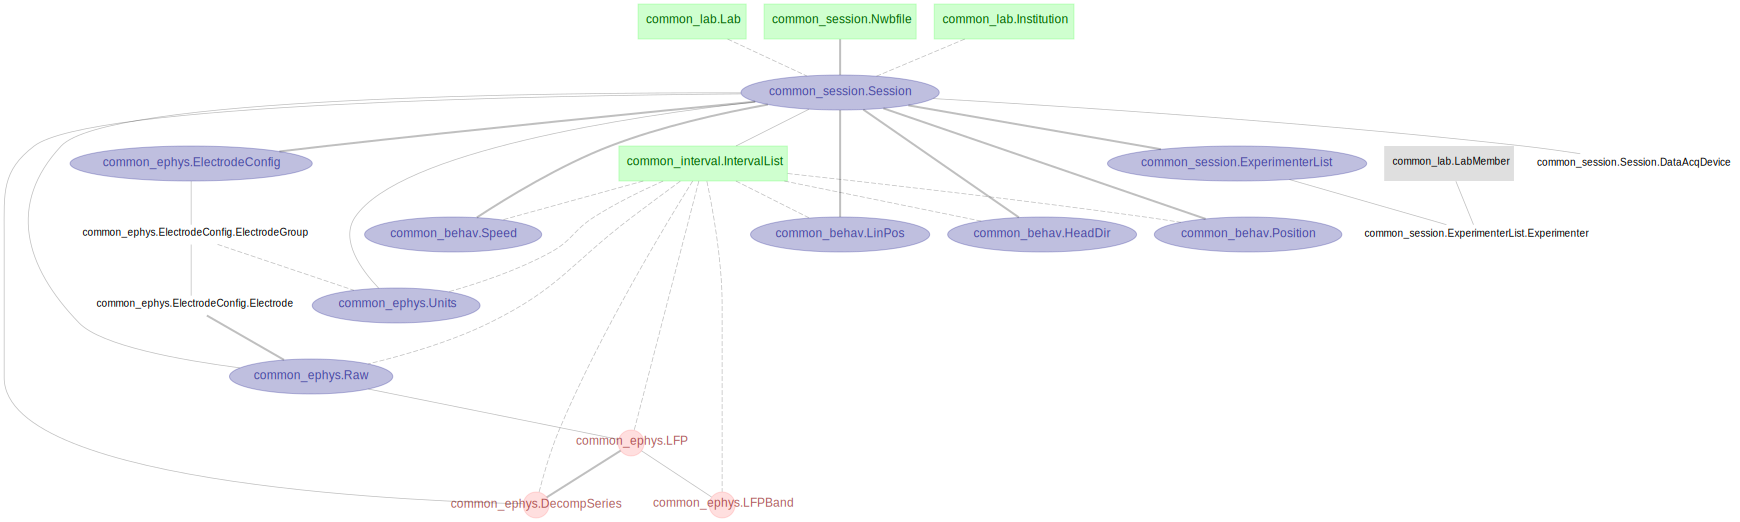

In [5]:
dj.Diagram(common_ephys)+dj.Diagram(common_session)+dj.Diagram(common_lab)+dj.Diagram(common_interval)+dj.Diagram(common_behav)

In [6]:
#### And now that we have the data in DataJoint, we can do queries to find time intervals we might be interested in
#### In the example below, we get all of the intervals where the task_name was sleep.

In [7]:
sleep_intervals = (common_interval.IntervalList() & (common_task.TaskEpoch() & 'task_name = "Sleep"')).fetch()
sleep_intervals

array([],
      dtype=[('nwb_file_name', 'O'), ('interval_name', 'O'), ('valid_times', 'O')])

In [26]:
sleep_intervals['valid_times']

array([array([1.13614661e+09, 1.13614794e+09]),
       array([1.13614908e+09, 1.13615003e+09]),
       array([1.13615118e+09, 1.13615241e+09]),
       array([1.13615411e+09, 1.13615495e+09])], dtype=object)

In [3]:
common_ephys

NameError: name 'common_ephys' is not defined

In [11]:
conn.connection

DataJoint connection (connected) root@localhost:3306

In [7]:
common_session.Nwbfile.drop()

[autoreload of common_session failed: Traceback (most recent call last):
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/loren/opt/anaconda3/envs/nwbdj/lib/python3.7/site-packages/IPython/extensio

`common_session`.`nwbfile` (1 tuples)
`common_session`.`_session` (0 tuples)
`common_session`.`_session__data_acq_device` (0 tuples)
`common_session`.`_experimenter_list` (0 tuples)
`common_session`.`_experimenter_list__experimenter` (0 tuples)
`common_interval`.`interval_list` (0 tuples)
`common_task`.`_task_epoch` (0 tuples)
`common_ephys`.`_raw` (0 tuples)
`common_behav`.`_speed` (0 tuples)
`common_behav`.`_raw_position` (0 tuples)
`common_behav`.`_lin_pos` (0 tuples)
`common_behav`.`_head_dir` (0 tuples)
`common_ephys`.`_electrode_config` (0 tuples)
`common_ephys`.`_electrode_config__electrode_group` (0 tuples)
`common_ephys`.`_units` (0 tuples)
`common_ephys`.`_electrode_config__electrode` (0 tuples)
`common_ephys`.`l_f_p_electrode` (0 tuples)
`common_ephys`.`__l_f_p` (0 tuples)
`common_ephys`.`l_f_p_band_parameters` (0 tuples)
`common_ephys`.`__l_f_p_band` (0 tuples)
`common_ephys`.`__decomp_series` (0 tuples)


Proceed? [yes, No]:  yes


Tables dropped.  Restart kernel.
